# Scikit-learn - Machine Learning
---
Source: https://scipy-lectures.org/packages/scikit-learn/index.html#scikit-learn-machine-learning-in-python

### Scikit-learn Estimators Interface (Recap)
https://scipy-lectures.org/packages/scikit-learn/index.html#a-recap-on-scikit-learn-s-estimator-interface

## Iris Example

In [1]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()
iris_dataset.data.shape

(150, 4)

In [2]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris_dataset.target.shape

(150,)

In [4]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Using a scatter plot to visualize the data
Source: https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_scatter.html#plot-2d-views-of-the-iris-dataset

In [5]:
from matplotlib import pyplot as plt

def plot_features(feature_xi: int, feature_yi: int, title: str):
    formatter = plt.FuncFormatter(lambda i, *args: iris_dataset.target_names[i])

    plt.figure(figsize=(5, 4))
    plt.scatter(iris_dataset.data[:, feature_xi], iris_dataset.data[:, feature_yi], c=iris_dataset.target)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(iris_dataset.feature_names[feature_xi])
    plt.ylabel(iris_dataset.feature_names[feature_yi])
    plt.title(title)

    plt.tight_layout()
    plt.show()

#### **Sepal length x Sepal width**

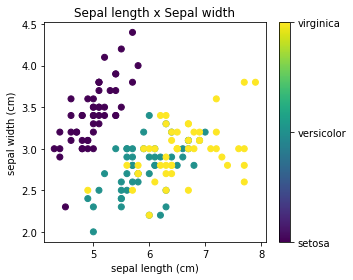

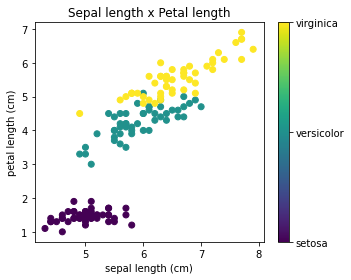

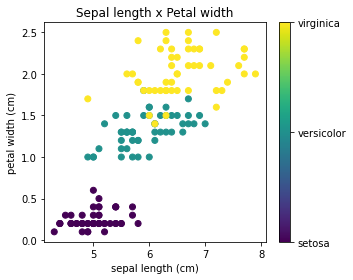

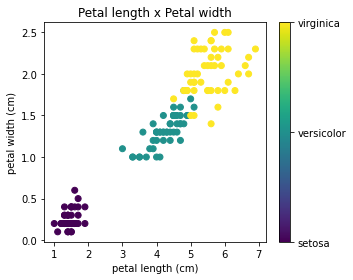

In [6]:
plot_features(0, 1, 'Sepal length x Sepal width')
plot_features(0, 2, 'Sepal length x Petal length')
plot_features(0, 3, 'Sepal length x Petal width')
plot_features(2, 3, 'Petal length x Petal width')

---

## Using PCA (Principal Component Analysis)

Source 1: https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py

Source 2: https://towardsdatascience.com/a-complete-guide-to-principal-component-analysis-pca-in-machine-learning-664f34fc3e5a

Explained variance ratio: [0.92461872 0.05306648]
Explained variance ratio cumaltive sum: [0.92461872 0.97768521]


Text(0.5, 1.0, 'PCA of IRIS dataset')

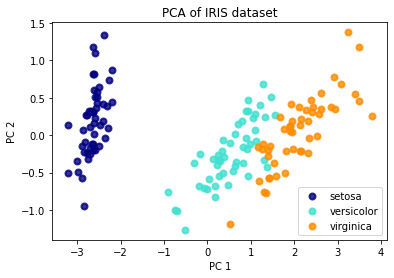

In [7]:
from sklearn.decomposition import PCA

X = iris_dataset.data
y = iris_dataset.target
target_names = iris_dataset.target_names

pca = PCA(n_components=2)
X_r = pca.fit_transform(X)

print('Explained variance ratio: %s' % str(pca.explained_variance_ratio_))
print('Explained variance ratio cumaltive sum: %s' % str(pca.explained_variance_ratio_.cumsum()))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
   plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('PCA of IRIS dataset')

### Explaning Principal Components
Source: https://stackabuse.com/implementing-pca-in-python-with-scikit-learn

In [8]:
X = iris_dataset.data
y = iris_dataset.target
target_names = iris_dataset.target_names

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#### Normalizing the features

In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
pca = PCA()

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Train and test data above will be used soon (K-NN Prediction)

### Plotting the **explained variance** according to number of components

Text(0, 0.5, 'cumulative explained variance')

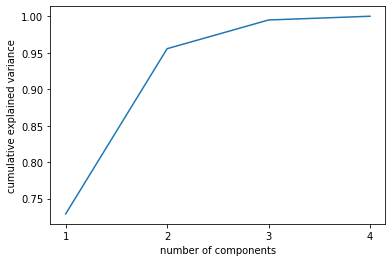

In [12]:
import numpy as np

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks([0, 1, 2, 3], [1, 2, 3, 4])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

**Little explanation about variance in PCA context:** https://stats.stackexchange.com/questions/22569/pca-and-proportion-of-variance-explained

---

## Predicting Iris classification
### Using K-NN (Nearest neighbors algorithm)

Source 1: https://scipy-lectures.org/packages/scikit-learn/auto_examples/plot_iris_knn.html#nearest-neighbor-prediction-on-iris

Source 2: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

StatQuest Explanation: https://www.youtube.com/watch?v=HVXime0nQeI

Another classifiers for nonlinear data: https://cmci.colorado.edu/classes/INFO-4604/fa17/files/slides-9_nonlinear.pdf

In [13]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap

def knn_fit(n_neighbors: int, train_data: np.ndarray, train_target: np.ndarray) -> neighbors.KNeighborsClassifier:
    knn = neighbors.KNeighborsClassifier(n_neighbors)
    return knn.fit(train_data, train_target)

### K=1 (Neighbors=1)

In [14]:
knn = knn_fit(1, X_train, y_train)
print('Score for test: ', knn.score(X_test, y_test))

y_pred = knn.predict(X_test)

Score for test:  0.9666666666666667


#### **Metrics**

In [15]:
from sklearn.metrics import classification_report, accuracy_score

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy Score:  0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#### **Confusion Matrix**

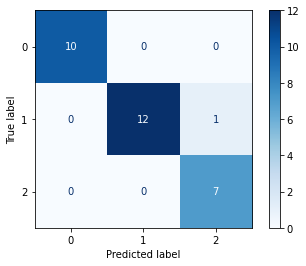

In [16]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)

### K=5 (Neighbors=5)

In [17]:
knn = knn_fit(3, X_train, y_train)
print('Score for test: ', knn.score(X_test, y_test))

y_pred = knn.predict(X_test)

Score for test:  0.9666666666666667


#### **Metrics**

In [18]:
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))

Accuracy Score:  0.9666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



#### **Confusion Matrix**

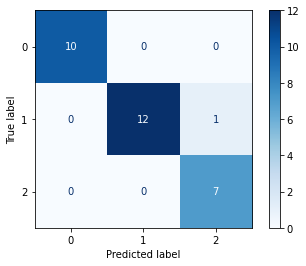

In [19]:
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)